In [2]:
# in this notebook varya is trying to fit the model to classify DF and FF 
# based on some features of the catchments (such as morphometrics and/or climate stuff)

In [ ]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

# i will try to use this tutorial

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
# read data: 

# in the copy table i have changed the FF/DF column 
df = pd.read_csv('morphometrical_params.csv', sep = ';', index_col = 0)

df = df[df.target.isin([1,0])]
# reset FF/DF to 0 and 1
# all - flood, some - DF
# df['target'] = df.Name = 

Text(0.5, 1.0, 'various parameters')

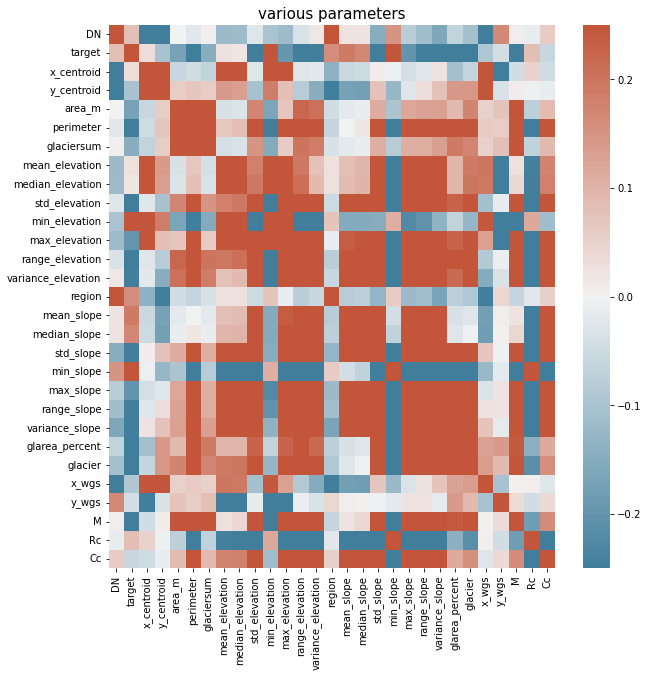

In [54]:
# correlations
df_corr = df.corr()


# plot

plt.figure(figsize=(10, 10))

# mask for the upper triangle
# mask = np.triu(np.ones_like(df_corr, dtype=bool))
# color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# heatmap 
# sns.heatmap(df_corr, cmap=cmap, mask = mask)
sns.heatmap(df_corr, cmap=cmap, vmin = -0.25, vmax = 0.25)
plt.title('various parameters', fontsize = 15)



In [55]:
# scatter plot (stupid one for now) 
# g = sns.PairGrid(df, hue = 'target')
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

# plt.savefig('params_scatter_sub.png', dpi = 300, bbox_inches = 'tight')


In [56]:
# scale the data with the z score: 


array([1, 0])

In [52]:
# whats the fraction is the FD and what is FF 



738

### model thing

In [57]:
# subset the data: 

df = df.columns

Index(['DN', 'target', 'Name', 'x_centroid', 'y_centroid', 'area_m',
       'perimeter', 'glaciersum', 'mean_elevation', 'median_elevation',
       'std_elevation', 'min_elevation', 'max_elevation', 'range_elevation',
       'variance_elevation', 'region', 'region_name', 'mean_slope',
       'median_slope', 'std_slope', 'min_slope', 'max_slope', 'range_slope',
       'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M',
       'Rc', 'Cc'],
      dtype='object')

In [58]:
df = df[['target', 'area_m', 'perimeter', 'glaciersum', 'mean_elevation', 'median_elevation', 
         'std_elevation', 'min_elevation', 'max_elevation', 'range_elevation',
         'variance_elevation', 'region', 'mean_slope', 'median_slope', 'std_slope', 
         'min_slope', 'max_slope', 'range_slope',
         'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M', 'Rc', 'Cc']]

In [61]:
x_columns = [ 'area_m', 'perimeter', 'glaciersum', 'mean_elevation', 'median_elevation', 
         'std_elevation', 'min_elevation', 'max_elevation', 'range_elevation',
         'variance_elevation', 'region', 'mean_slope', 'median_slope', 'std_slope', 
         'min_slope', 'max_slope', 'range_slope',
         'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M', 'Rc', 'Cc']
y_column = 'target'

In [62]:
# split data into X and y
X = df[x_columns]
y = df[y_column]

In [64]:
# split to train test: 

seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [76]:
# 1. fit model to training data

model = XGBClassifier(n_estimators=1000, depth=2)
model.fit(X_train, y_train)

[15:23:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=2, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [77]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=2, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)


In [128]:
# 5. Make Predictions

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
# accuracy = accuracy_score(y_test, predictions)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.84%


In [129]:
len(df)

738

In [130]:
# random guess: 

555/738 * 100#df/total 

75.20325203252033

In [136]:
# predict probability (not class) 

probs = model.predict_proba(X_test)
# 2 columns: (1) 0 is true, (2) 1 is true
# therefore take the 2nd column:
probs = probs[:,1]



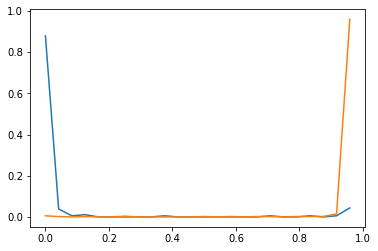

In [179]:
# ------- probability distributions plot:

# calculate probabilities 
# split into 2 classes 

debris = df[df.target.isin([1,])] # df
flood = df[df.target.isin([0,])]  # ff 

# split data into X and y
Xdebris = debris[x_columns]
ydebris = debris[y_column]

Xflood = flood[x_columns]
yflood = flood[y_column]

# debris:
dfprobs = model.predict_proba(Xdebris)
dfprobs = dfprobs[:,1]
# floods:
ffprobs = model.predict_proba(Xflood)
ffprobs = ffprobs[:,1]



# ------- histograms -------
# normalize: 
# dfprobs = dfprobs/dfprobs.sum()
# ffprobs = ffprobs/ffprobs.sum()

# plot:
# plt.hist(ffprobs, bins = np.arange(0, 1, 25))
# plt.hist(dfprobs, bins = np.arange(0, 1, 25))

fig, ax = plt.subplots()

# ax.hist(ffprobs, bins=np.linspace(0,1, 25))
# ax.hist(dfprobs,bins=np.linspace(0,1, 25))

h, e = np.histogram(ffprobs, bins=np.linspace(0, 1, 25))

ax.plot(e[:-1], h/h.sum())

hd, ed = np.histogram(dfprobs, bins=np.linspace(0, 1, 25))
ax.plot(ed[:-1], hd/hd.sum())

In [163]:
### ROC curve: 
from sklearn.metrics import roc_curve, auc

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# what it all means: 


ValueError: y should be a 1d array, got an array of shape (148, 2) instead.

In [118]:
# len(tpr)